# matplot 한글 폰트 설치 및 적용

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 12 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,749 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 144786 files and d

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumBarunGothic')

# 8.3 PCA

In [2]:
# 책에 없지만 정상동작을 위한 코드
import numpy as np

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles) / 2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

## 8.3.2 주성분

In [3]:
X_centered = X - X.mean(axis = 0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

## 8.3.4 사이킷런 사용하기

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

## 8.3.5 설명된 분산의 비율

In [5]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

## 8.3.6 적절한 차원 수 선택하기

In [7]:
# 책에 없지만 코드 정상동작을 위해 코드 추가
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', version = 1)
mnist.target = mnist.target.astype(np.uint8)

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [9]:
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X_train)

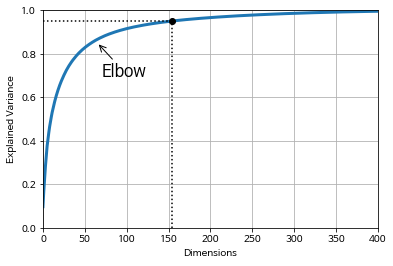

In [11]:
# 책에 없지만, 그래프 출력을 위해 코드 추가 (그림 8-8, p286)
import matplotlib.pyplot as plt

plt.figure(figsize = (6, 4))
plt.plot(cumsum, linewidth = 3)

plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")

plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")

plt.annotate("Elbow", xy = (65, 0.85), xytext = (70, 0.7), arrowprops = dict(arrowstyle = "->"), fontsize = 16)
plt.grid(True)
plt.show()

## 8.3.7 압축을 위한 PCA

In [12]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

## 8.3.8 랜덤 PCA

In [13]:
rnd_pca = PCA(n_components = 154, svd_solver = "randomized", random_state = 42)
X_reduced = rnd_pca.fit_transform(X_train)

# 8.4 커널 PCA

In [14]:
# 책에 없지만, 책과 동일한 결과 확인을 위해 값 세팅
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples = 1000, noise = 0.2, random_state = 42)

In [15]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel = "rbf", gamma = 0.04)
X_reduced = rbf_pca.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


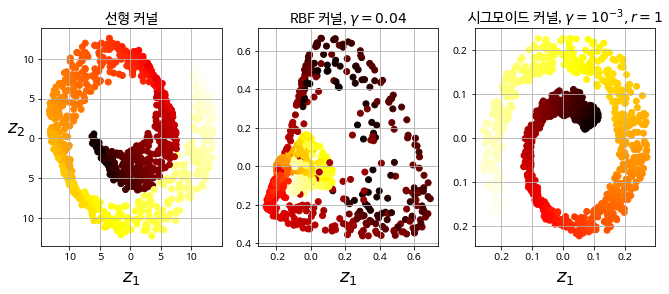

In [16]:
# 책에 없지만, 그래프 출력을 위한 코드 (그림 8-10, p290)
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

lin_pca = KernelPCA(n_components = 2, kernel = "linear",  fit_inverse_transform = True)
rbf_pca = KernelPCA(n_components = 2, kernel = "rbf",     fit_inverse_transform = True, gamma = 0.0433)
sig_pca = KernelPCA(n_components = 2, kernel = "sigmoid", fit_inverse_transform = True, gamma = 0.001, coef0 = 1)

y = t > 6.9

plt.figure(figsize = (11, 4))

for subplot, pca, title in ((131, lin_pca, "선형 커널"), (132, rbf_pca, "RBF 커널, $\gamma=0.04$"), (133, sig_pca, "시그모이드 커널, $\gamma=10^{-3}, r=1$")) :
  X_reduced = pca.fit_transform(X)
  if subplot == 132:
    X_reduced_rbf = X_reduced
  plt.subplot(subplot)
  plt.title(title, fontsize = 14)
  plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = t, cmap = plt.cm.hot)
  plt.xlabel("$z_1$", fontsize = 18)

  if subplot == 131:
    plt.ylabel("$z_2$", fontsize = 18, rotation = 0)
  plt.grid(True)

plt.show()

## 8.4.1 커널 선택과 하이퍼파라미터 튜닝

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
                ("kpca", KernelPCA(n_components = 2)),
                ("log_reg", LogisticRegression(solver = "lbfgs"))
])

param_grid = [{
    "kpca__gamma" : np.linspace(0.03, 0.05, 10), 
    "kpca__kernel" : ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv = 3)
grid_search.fit(X, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kpca',
                                        KernelPCA(alpha=1.0, coef0=1,
                                                  copy_X=True, degree=3,
                                                  eigen_solver='auto',
                                                  fit_inverse_transform=False,
                                                  gamma=None, kernel='linear',
                                                  kernel_params=None,
                                                  max_iter=None, n_components=2,
                                                  n_jobs=None,
                                                  random_state=None,
                                                  remove_zero_eig=False,
                                                  tol=0)),
                                       ('log_reg',
                                 

In [19]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


In [20]:
rbf_pca = KernelPCA(n_components = 2, kernel = "rbf", gamma = 0.0433, fit_inverse_transform = True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [21]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X, X_preimage)

32.786308795766075

# 8.5 LLE

In [23]:
# 책에 없지만, 책과 동일한 결과 확인을 위해 값 세팅
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples = 1000, noise = 0.2, random_state = 41)

In [25]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components = 2, n_neighbors = 10, random_state = 42)
X_reduced = lle.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


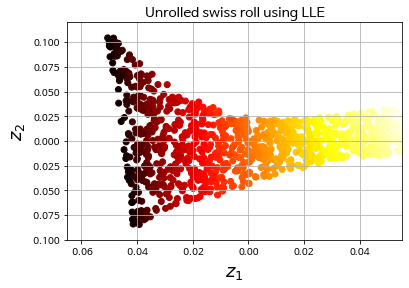

In [26]:
# 책에 없지만, 그래프 출력을 위한 코드 (그림 8-12, p293)
import matplotlib.pyplot as plt

plt.title("Unrolled swiss roll using LLE", fontsize = 14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = t, cmap = plt.cm.hot)

plt.xlabel("$z_1$", fontsize = 18)
plt.ylabel("$z_2$", fontsize = 18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)
plt.show()